# Homework 2
Name: Priyam Mazumdar

NetID: priyamm2

In [1]:
# Import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# Read in Dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Split data in train and test
random.seed(2)

index = list(range(len(data)))
train_index = random.sample(index, len(index)//2)
test_index = [i for i in index if i not in train_index]

train_data, test_data = data.iloc[train_index].reset_index(drop=True), data.iloc[test_index].reset_index(drop=True)

train_X, train_y = np.array(train_data.drop(columns="Outcome").values), np.array(train_data["Outcome"].values)
test_X, test_y = np.array(test_data.drop(columns="Outcome").values), np.array(test_data["Outcome"].values)

768


## Question 1 

Load the Pima Indians Diabetes Database (`PimaIndiansDiabetes`) from the `mlbench` package. If you don't already have this package installed, use the following code. It also randomly splits the data into training and testing. You should preserve this split in the analysis. 

Read the documentation of this dataset [here](https://cran.r-project.org/web/packages/mlbench/mlbench.pdf) and make sure that you understand the goal of this classification problem. 

Use a grid of $k$ values (every integer) from 1 to 20. 

a) [10 pts] Fit a KNN model using `Diab.train` and calculate both training and testing errors. For the testing error, use `Diab.test`. Plot the two errors against the corresponding $k$ values. Make sure that you differentiate them using different colors/shapes and add proper legends. 

### Problem 1a:

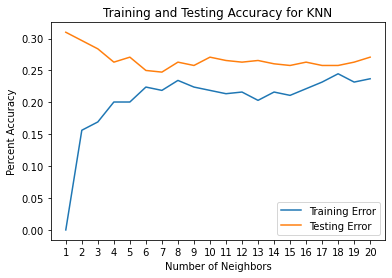

Optimal K: 7
Lowest Testing Error: 0.2344


In [11]:
train_score = []
test_score = []
num_iter = 20
for k in range(1,num_iter+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    test_score.append(1 - knn.score(test_X, test_y))
    train_score.append(1 - knn.score(train_X, train_y))
    
plt.plot(range(1,num_iter+1), train_score, label="Training Error")
plt.plot(range(1,num_iter+1), test_score, label="Testing Error")
plt.xticks(np.arange(1, num_iter+1, 1.0))
plt.title("Training and Testing Accuracy for KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Percent Accuracy")
plt.legend()
plt.show()

highest_training_score = np.array(test_score).argmin() + 1
print("Optimal K:", highest_training_score)
print("Lowest Testing Error:", round(train_score[highest_training_score],4))

b) [15 pts] Does the plot match (approximately) our intuition of the bias-variance trade-off in terms of having a U-shaped error? What is the optimal $k$ value based on this result? For the optimal `k`, what is the corresponding degrees-of-freedom and its error?

**Answer**

We see elements of the bias-variance tradeoff, for example when K=1, we can see a very low testing error but a high training error. This is because at K=1, we are able to perfectly reproduce our data, thus giving a low bias, but as we get more data it is unlikely to fall into this perfect reproduction, therefore a high variance. As we increase K we see that our tesing error is starting to decrease, therefore our model is properly generalizing, but as K get even larger, our testing error increases again. This is because a highly paramaterized model is going to have low variance but a high suceptibility to bias.

The optimial value for K is 7, as that is when we get our lowest error of 0.2344, and the corresponding degrees of freedom would be 54. 

c) [15 pts] Suppose we do not have access to `Diab.test` data. Thus, we need to further split the training data into train and validation data to tune `k`. For this question, use the `caret` package to complete the tuning. You are required to 
   * Train the model with cross-validation using the `train()` function.
      * Specify the type of cross-validation using the `trainControl()` function. We need to use three-fold cross-validation.
      * Specify a grid of tuning parameters. This can be done using `expand.grid(k = c(1:20))`.
   * Report the best parameter with its error. Compare it with your `k` in b).

In [5]:
param_grid = {"n_neighbors": list(range(1,21))}

KNN_search_cv = GridSearchCV(KNeighborsClassifier(), 
                             param_grid=param_grid,
                             scoring="accuracy",
                             cv=3,
                             n_jobs=-1)

KNN_search_cv.fit(train_X, train_y)

print("Optimal K:", KNN_search_cv.best_params_["n_neighbors"])
print("Lowest Error:", 1 - KNN_search_cv.best_score_)

Optimal K: 9
Lowest Error: 0.27864583333333337


When doing a 3-fold cross-validation on only our training data we get the best parameter for the number of neighbors to be 9, with the lowest error of 0.278. This is slightly higher than the K of 7 we got previously, and our error from CV is also slightly higher from 0.2344 on our testing data in the last problem. 

## Question 2
a. [10 pts] Generate $p=5$ independent standard Normal covariates $X_1, X_2, X_3, X_4, X_5$ of $n = 1000$ independent observations. Then, generate $Y$ from the regression model
  $$ Y = X_1 + 0.5 \times X_2 - X_3 + \epsilon,$$
with i.i.d. standard normal error $\epsilon$. Make sure to set a random seed 1 for reproducibility. 

 - Use a KNN implementation from an existing package. Report the mean squared error (MSE) for your prediction with `k = 5`. Use the first 500 observations as the training data and the rest as testing data. Predict the $Y$ values using your KNN function with `k = 5`. Mean squared error is 
  $$\frac{1}{N}\sum_i (y_i - \widehat y_i)^2$$ This question also helps you validate your own function in b). a) and b) are expected have similar (possibly not identical) results.
  - Hints: this is a **regression** problem instead of a classification one.


In [6]:
np.random.seed(1)
X_data = np.random.standard_normal(size=(1000,5))
linear_transformation = np.array([1, 0.5, -1, 0, 0]).reshape(5,1)
Y_data = X_data.dot(linear_transformation) + np.random.standard_normal(size=(1000,1))

train_X, train_y = X_data[:500], Y_data[:500]
test_X, test_y = X_data[500:], Y_data[500:]

In [7]:
knnreg = KNeighborsRegressor(n_neighbors = 5, metric='euclidean')
knnreg.fit(train_X, train_y)

print("Mean Squared Error:",mean_squared_error(knnreg.predict(test_X), test_y))


Mean Squared Error: 1.3296005985016977


b. [30 pts] For this question, you __cannot__ use (load) any additional `R` package. Write your own function `myknn(xtrain, ytrain, xtest, k)` that fits a KNN model and predict multiple target points `xtest`. The function should return a variable `ytest`.
    - Here, `xtrain` is the training dataset covariate value, `ytrain` is the training data outcome, and `k` is the number of nearest neighbors. `ytest` is the prediction on `xtest`. 
    - Use Euclidean distance to calculate the closeness between two points.
    - Test your code by reporting the mean square error on the testing data. 


In [8]:
class KNNRegressor:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
    def fit(self,x,y):
        """
        Store training data to compare to during predictions
        """
        self.train_x = x
        self.train_y = y
    
    def predict(self,x):
        """
        Loop through all available test data and generate predictions
        """
        predictions_list = []
        for test in x:
            predictions_list.append(self.predict_single_sample(test))
        return np.array(predictions_list).reshape(-1, 1)
    
    def predict_single_sample(self, x):
        """
        For a single sample calculate the euclidian distance and averaget the n closest points
        """
        distance_list = []
        for train in self.train_x:
            distance_list.append(self.euclidian_distance(train, x))
        distance_list = np.array(distance_list)
        indicies = distance_list.argsort()[:self.n_neighbors]
        prediction = self.train_y[indicies].mean()
        return prediction
    
    def mse_score(self,x,y):
        """
        Calculate the mean squared error of a set of samples
        """
        predictions = self.predict(x)
        return np.sum((predictions - y)**2) / len(predictions)
        
    def euclidian_distance(self,train, x):
        return np.sum((train - x)**2)**0.5
        
    
    
    
knn = KNNRegressor(n_neighbors=5)
knn.fit(train_X, train_y)

print("Mean Squared Error:",knn.mse_score(test_X, test_y))


Mean Squared Error: 1.3296005985016977


# Question 3

Let's consider a high-dimensional setting. Keep the data-generating model the same as question 2. In addition to the outcomes and covariates from question 2, we will also generate 95 more noisy variables to make p = 100. In this question, you can use a KNN function from any existing package. 

We consider two different settings to generate that additional set of 95 covariates. Make sure to set random seeds for reproducibility. 

  * Generate another 95-dimensional covariates with all independent standard Gaussian entries.
  * Generate another 95-dimensional covariates using the formula $X^T A$, where $X$ is the original 5-dimensional vector, and $A$ is a $5 \times 95$ dimensional (fixed) matrix that remains the same for all observations. You should generate $A$ just once using i.i.d. uniform $[0, 1]$ entries and then apply $A$ to your current 5-dimensional data. 

Fit KNN in both settings (with the total of 100 covariates) and select the best $k$ value. Answer the following questions

  a) [10 pts] For the first setting, what is the best $k$ and the best mean squared error for prediction?
  
  b) [10 pts] For the second setting, what is the best $k$ and the best mean squared error for prediction?
  
  c) [10 pts] In which setting $k$NN performs better? Why?

In [9]:
np.random.seed(1)
# a) First Setting Data Gen
first_setting_gen_data = np.random.standard_normal(size=(1000,95))
first_setting_gen_data = np.concatenate((X_data, first_setting_gen_data), axis=1)
first_settings_train, first_settings_test = first_setting_gen_data[:500], first_setting_gen_data[500:]
lowest_error = np.inf 
optimal_first_k = 0
for i in range(1,100):
    knnreg = KNeighborsRegressor(n_neighbors = i, metric='euclidean')
    knnreg.fit(first_settings_train, train_y)
    mse = mean_squared_error(knnreg.predict(first_settings_test), test_y)
    if mse < lowest_error:
        lowest_error = mse
        optimal_first_k = i
        
print("--- First Settings ---")
print("Optimal K:",optimal_first_k)
print("Lowest Error:", lowest_error)



# b) Second Setting Data Gen
A = np.random.uniform(size=(5,95))
second_setting_gen_data = np.concatenate((X_data, X_data.dot(A)), axis=1)
second_settings_train, second_settings_test = second_setting_gen_data[:500], second_setting_gen_data[500:]

lowest_error = np.inf 
optimal_second_k = 0
for i in range(1,100):
    knnreg = KNeighborsRegressor(n_neighbors = i, metric='euclidean')
    knnreg.fit(second_settings_train, train_y)
    mse = mean_squared_error(knnreg.predict(second_settings_test), test_y)
    if mse < lowest_error:
        lowest_error = mse
        optimal_second_k = i
        
print("--- Second Settings ---")
print("Optimal K:",optimal_second_k)
print("Lowest Error:", lowest_error)


--- First Settings ---
Optimal K: 13
Lowest Error: 2.411872848822325
--- Second Settings ---
Optimal K: 7
Lowest Error: 1.5471072743000391


### Answer
I found that our KNN for the second setting yielded better performance with a lower error. The reason for this is because in the first setting we added purely random noise to our data, thus clouding the underlying relationships between predictors. On the other hand, in the second setting we generated random uniform data but applied a transformation to it from our original 5 predictors, which in turn has made the uniform data produced more in line with the original data. The original data was also used to generate our Y target, so it makes sense that the 100 predictors that flollow the patterns of our original dataset performs better. 